In [1]:
import numpy as np
from keras.models import Model
from keras.layers import Dense,BatchNormalization,Conv1D
from keras.layers import Input,GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate
from keras.optimizers import Adam
import keras.backend as K
import keras

from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,CSVLogger
import datetime
from keras.callbacks import History
import matplotlib.pyplot as plt
import pickle
from keras.models import load_model

from keras.applications.xception import preprocess_input

import tensorflow as tf

In [2]:
model = load_model('models/30_model_andrew.h5')

In [3]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 29, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 29, 64)       64          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 29, 64)       256         conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 29, 64)       12288       batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [5]:
track = np.loadtxt("em27.txt")
center_norm(track)

array([[[ 1.73253166e-01],
        [-5.54241069e-01],
        [ 6.16733678e-01],
        [-2.48683591e-01],
        [ 2.54480469e-01],
        [-4.29389777e-02],
        [-1.79832340e-01],
        [ 2.32593132e-01],
        [-3.17356066e-01],
        [ 1.69165453e+00],
        [ 3.34841404e-01],
        [-4.38379150e-01],
        [ 1.80020163e-01],
        [-2.30509713e-01],
        [-1.01281059e-01],
        [ 1.01069758e-01],
        [ 4.66774624e-01],
        [-6.05200674e-01],
        [ 3.82956436e-01],
        [-4.76397990e-04],
        [-3.23954899e-01],
        [ 3.65581506e-01],
        [-2.69713956e-01],
        [ 2.29245740e-01],
        [-1.34364383e-01],
        [ 4.83719351e+00],
        [-3.18104785e-02],
        [-1.07849880e+00],
        [ 2.50337958e-02]]])

In [6]:
# Get the layer of the last conv layer
final_conv_layer  = model.get_layer('conv1d_12')
# Get the weights matrix of the last layer
class_weights = model.layers[-1].get_weights()[0]
# Prepare track
#     track =np.loadtxt("em18tracks.txt")[i]

t = center_norm(track)

# # Print what the top predicted class is
index_to_type = {0: "fbm", 1: "brownian", 2: "ctrw"}
preds = model.predict(t)
c = np.argmax(preds)
print(preds)
print("Predicted:", index_to_type[np.argmax(preds)])

[[3.3935593e-04 1.8232089e-04 9.9947840e-01]]
Predicted: ctrw


In [12]:
get_output = K.function([model.layers[0].input], [final_conv_layer.output, model.layers[-1].output])
[conv_outputs, predictions] = get_output([t])
conv_outputs = conv_outputs[0, ...]

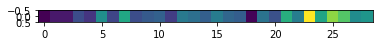

In [13]:
cam = class_weights[np.newaxis, :, c] @ conv_outputs.T
plt.imshow(cam)